In [553]:
import pandas as pd
from sklearn.model_selection import train_test_split

from dateutil.parser import parse
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

from datetime import datetime as dt
import numpy as np
import math
from sklearn import preprocessing

# Resource
# https://www.machinelearningplus.com/time-series/time-series-analysis-python/

In [554]:
df = pd.read_csv("Electric_Production.csv", parse_dates=['DATE'])

In [555]:
df['DATE'].dtypes

dtype('<M8[ns]')

In [556]:
df

,DATE,Value
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151
...,...,...
392,2017-09-01,98.6154
393,2017-10-01,93.6137
394,2017-11-01,97.3359
395,2017-12-01,114.7212


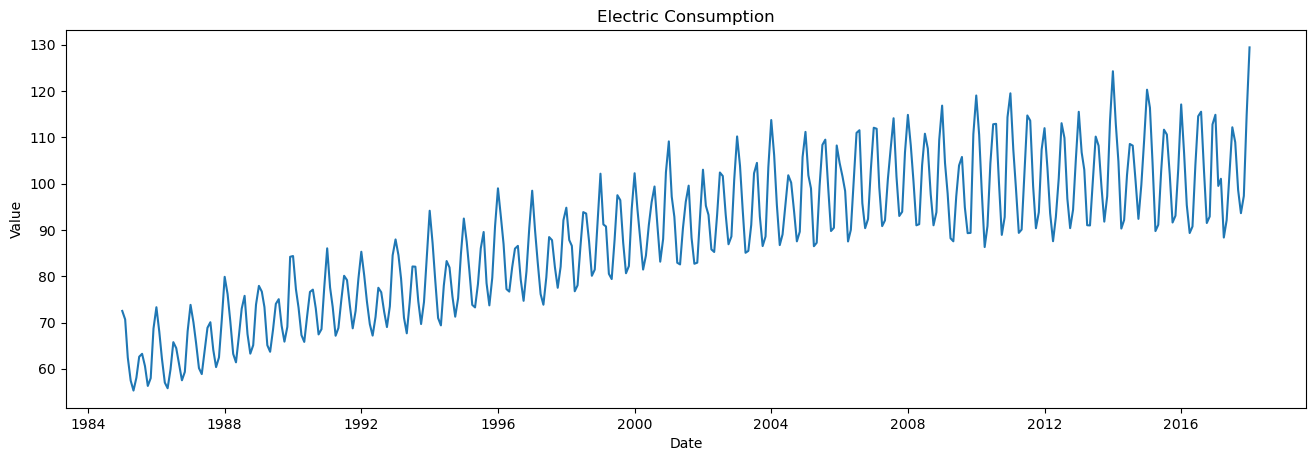

In [557]:
plot_df(df, x=df.DATE, y=df.Value, title='Electric Consumption')

In [558]:
# Plot for month/seasonal trends is optional


In [559]:
# Multiplicative Decomposition
df = pd.read_csv("Electric_Production.csv", parse_dates=['DATE'], index_col='DATE')

result_mul = seasonal_decompose(df['Value'], model='multiplicative', extrapolate_trend='freq')

In [560]:
# Additive Decomposition
result_add = seasonal_decompose(df['Value'], model='additive', extrapolate_trend='freq')

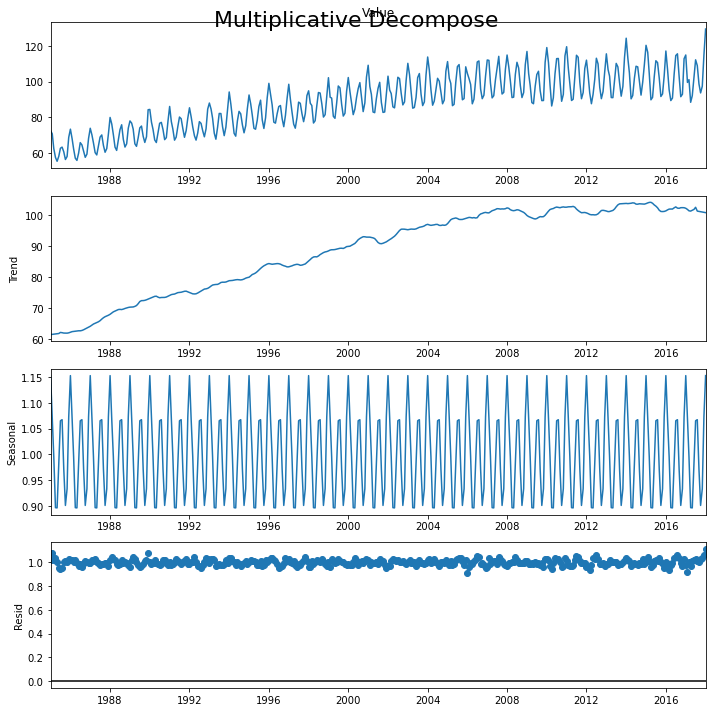

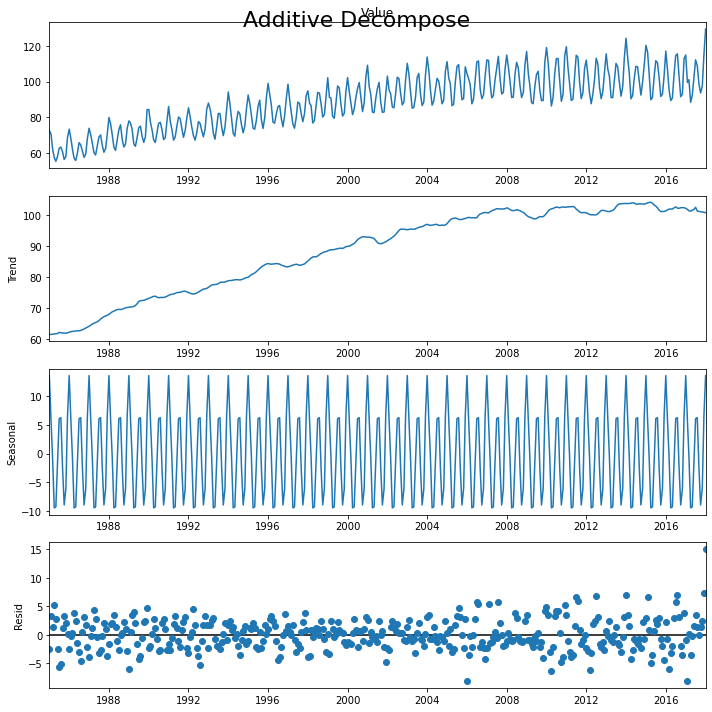

In [561]:
#Plot

plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)

result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [562]:
# Extract Components 
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()


,seas,trend,resid,actual_values
DATE,,,,
1985-01-01,1.152903,61.508657,1.022446,72.5052
1985-02-01,1.067341,61.577679,1.075279,70.6720
1985-03-01,0.995556,61.646701,1.017556,62.4502
1985-04-01,0.896242,61.715723,1.039036,57.4714
1985-05-01,0.895830,61.784745,0.999395,55.3151


In [563]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [564]:
model = SARIMAX(df, order=(1, 1, 1), seasonal_order=(1,1,1,12))
model_fit = model.fit(disp=False)

C:\Users\Ramzi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Ramzi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [565]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Value   No. Observations:                  397
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -888.613
Date:                            Wed, 23 Feb 2022   AIC                           1787.226
Time:                                    17:07:14   BIC                           1806.979
Sample:                                01-01-1985   HQIC                          1795.061
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5249      0.045     11.764      0.000       0.437       0.612
ma.L1         -0.9547      0.018    -54.378      0.000      -0.989      -0.920
ar.S.L12       0.0417      0.057      0.727      0.467      -0.071       0.154
ma.S.L12      -0.7688      0.045    -17.104      0.000      -0.857      -0.681
sigma2         5.8004      0.341     16.998      0.000       5.132       6.469
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                27.47
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               3.01   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [566]:
# Create a list and append it with the predicted data
prediction = []
for i in range(12):
    yhat = model_fit.predict(len(df) + i-1)
    prediction.append([yhat.index[0], yhat[0]])
    print(yhat)

2018-01-01    120.382479
Freq: MS, dtype: float64
2018-02-01    114.01141
Freq: MS, dtype: float64
2018-03-01    105.122195
Freq: MS, dtype: float64
2018-04-01    92.714328
Freq: MS, dtype: float64
2018-05-01    94.159403
Freq: MS, dtype: float64
2018-06-01    104.621735
Freq: MS, dtype: float64
2018-07-01    113.861598
Freq: MS, dtype: float64
2018-08-01    112.608924
Freq: MS, dtype: float64
2018-09-01    101.931921
Freq: MS, dtype: float64
2018-10-01    93.997363
Freq: MS, dtype: float64
2018-11-01    97.27118
Freq: MS, dtype: float64
2018-12-01    112.651719
Freq: MS, dtype: float64


In [567]:
yhat.index[0]

Timestamp('2018-12-01 00:00:00', freq='MS')

In [568]:
print(prediction)

[[Timestamp('2018-01-01 00:00:00', freq='MS'), 120.38247884248771], [Timestamp('2018-02-01 00:00:00', freq='MS'), 114.01140972766186], [Timestamp('2018-03-01 00:00:00', freq='MS'), 105.12219474528865], [Timestamp('2018-04-01 00:00:00', freq='MS'), 92.71432791981978], [Timestamp('2018-05-01 00:00:00', freq='MS'), 94.1594032329188], [Timestamp('2018-06-01 00:00:00', freq='MS'), 104.6217351033256], [Timestamp('2018-07-01 00:00:00', freq='MS'), 113.86159772505108], [Timestamp('2018-08-01 00:00:00', freq='MS'), 112.60892391770926], [Timestamp('2018-09-01 00:00:00', freq='MS'), 101.93192084857206], [Timestamp('2018-10-01 00:00:00', freq='MS'), 93.9973628396618], [Timestamp('2018-11-01 00:00:00', freq='MS'), 97.27117969131908], [Timestamp('2018-12-01 00:00:00', freq='MS'), 112.65171905127016]]


In [569]:
# Electric Production Prediction table for year 2018
df2 = pd.DataFrame(prediction, columns = ['DATE', 'Value'])
display(df2)

,DATE,Value
0,2018-01-01,120.382479
1,2018-02-01,114.011410
2,2018-03-01,105.122195
3,2018-04-01,92.714328
4,2018-05-01,94.159403
5,2018-06-01,104.621735
6,2018-07-01,113.861598
7,2018-08-01,112.608924
8,2018-09-01,101.931921
9,2018-10-01,93.997363


In [570]:
df2['DATE'].dtypes

dtype('<M8[ns]')

In [571]:
df = df.reset_index()
df

,DATE,Value
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151
...,...,...
392,2017-09-01,98.6154
393,2017-10-01,93.6137
394,2017-11-01,97.3359
395,2017-12-01,114.7212


In [572]:
result = pd.concat([df, df2], ignore_index=True, axis = 0)

In [573]:
result

,DATE,Value
0,1985-01-01,72.505200
1,1985-02-01,70.672000
2,1985-03-01,62.450200
3,1985-04-01,57.471400
4,1985-05-01,55.315100
...,...,...
404,2018-08-01,112.608924
405,2018-09-01,101.931921
406,2018-10-01,93.997363
407,2018-11-01,97.271180


In [574]:
df_predicted = pd.DataFrame(data=result)
df_predicted

,DATE,Value
0,1985-01-01,72.505200
1,1985-02-01,70.672000
2,1985-03-01,62.450200
3,1985-04-01,57.471400
4,1985-05-01,55.315100
...,...,...
404,2018-08-01,112.608924
405,2018-09-01,101.931921
406,2018-10-01,93.997363
407,2018-11-01,97.271180


In [575]:
#df_predicted = df_predicted.set_index('DATE')
df_predicted

,DATE,Value
0,1985-01-01,72.505200
1,1985-02-01,70.672000
2,1985-03-01,62.450200
3,1985-04-01,57.471400
4,1985-05-01,55.315100
...,...,...
404,2018-08-01,112.608924
405,2018-09-01,101.931921
406,2018-10-01,93.997363
407,2018-11-01,97.271180


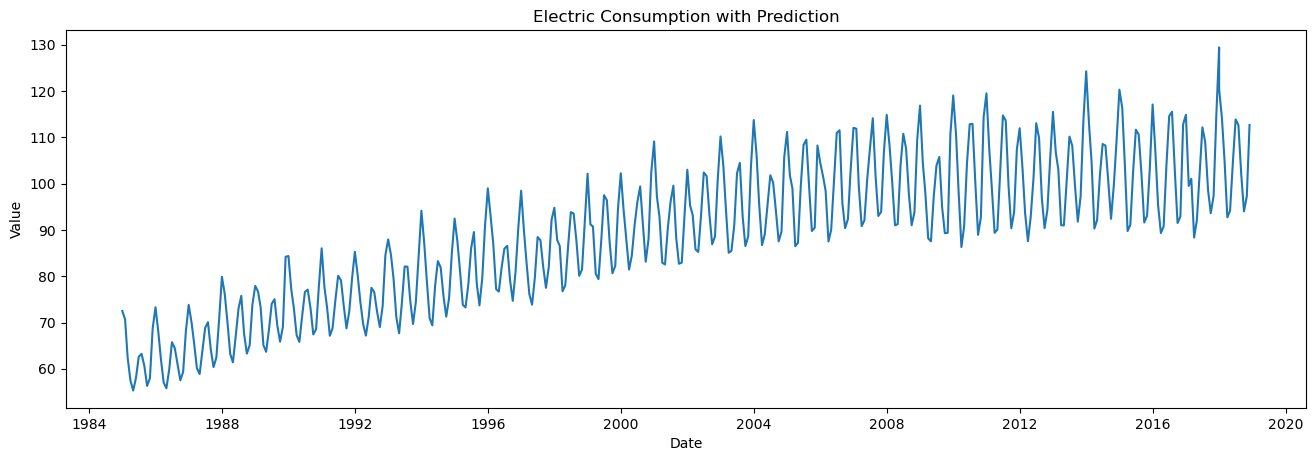

In [597]:
plot_df(df_predicted, df_predicted.DATE, df_predicted.Value, title='Electric Consumption with Prediction')

In [603]:
df_predicted['Color'][:397]='Green'
df_predicted['Color'][397:]='Red'

<ipython-input-603-382a056cc36f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predicted['Color'][:397]='Green'
<ipython-input-603-382a056cc36f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predicted['Color'][397:]='Red'


In [607]:
df_predicted.tail(15)

,DATE,Value,Color
394,2017-11-01,97.335900,Green
395,2017-12-01,114.721200,Green
396,2018-01-01,129.404800,Green
397,2018-01-01,120.382479,Red
398,2018-02-01,114.011410,Red
399,2018-03-01,105.122195,Red
400,2018-04-01,92.714328,Red
401,2018-05-01,94.159403,Red
402,2018-06-01,104.621735,Red
403,2018-07-01,113.861598,Red


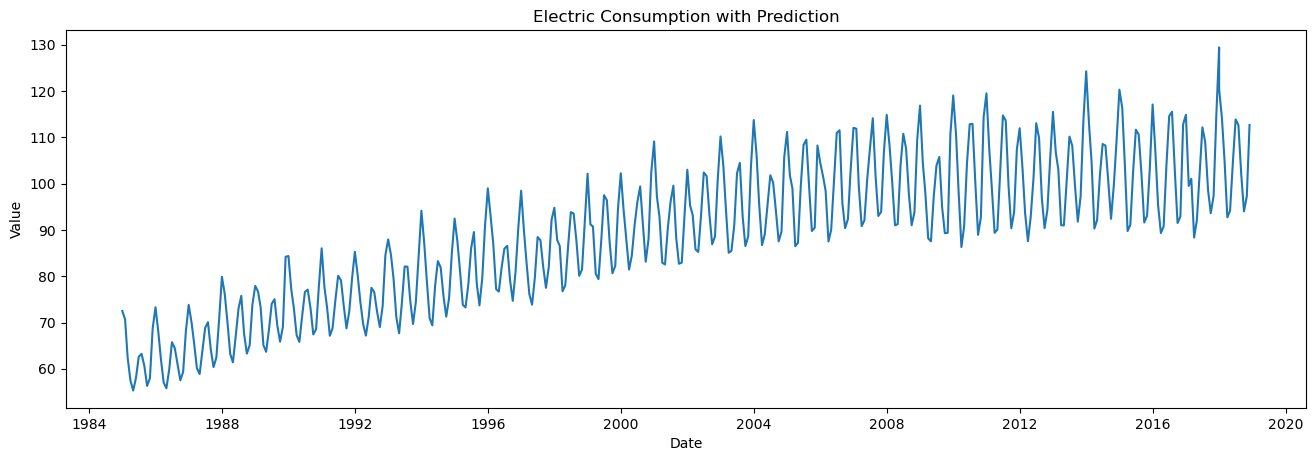

In [626]:
plot_df(df_predicted, df_predicted.DATE, df_predicted.Value, title='Electric Consumption with Prediction')